In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().strftime('%d.%m.%Y')} / Tatu Erkinjuntti')

Päivitetty 05.12.2024 / Tatu Erkinjuntti


# Tehtävä 3, koneoppiminen

## Osa 1 - luokittelumalli

Valitse jompikumpi seuraavista datoista (löytyvät data-kansiosta alla) tai vaihtoehtoisesti käytä omaa dataa. Kokeile vähintään kahta luokittelumallia ja vertaile mallien paremmuutta.

### Datoja

#### Viinien luokittelu rypälelajikkeen mukaan (luokittelu) Wine.xlsx

Eri rypälelajikkeista valmistettuja viinejä. Kokeile miten eri luokittelumallit osaavat tunnistaa viinin ominaisuuksien perusteella rypälelajikkeen (Y), josta viini on valmistettu.

Lähde: https://archive.ics.uci.edu/ml/datasets/Wine

Data aukeaa komennolla df=pd.read_excel('wine.xlsx')

#### Ostavien asiakkaiden tunnistaminen (luokittelu) KidCreative.xlsx

Voiko taustamuuttujien perusteella tunnistaa asiakkaat, jotka ostavat tietyn tuotteen. Obs no. -muuttuja pitää pudottaa pois ennen mallin laskemista. 

Data aukeaa komennolla df = pd.read_excel('KidCreative.xlsx')

## Osa 2 - regressiomalli

Valitse jokin seuraavista datoista (löytyvät data-kansiosta) tai vaihtoehtoisesti voit käyttää omaa dataa. Valitse tilanteeseen sopivat selittävät muuttujat (perustele valintasi), laadi regressiomalli ja arvioi mallin hyvyyttä.

### Datoja

#### Betonin lujuuteen vaikuttavia tekijöitä (regressio) Concrete_Data.xlsx

Lähde: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

Data aukeaa komennolla df=pd.read_excel('Concrete_Data.xlsx')

Valitse selitettäväksi muuttujaksi 'Concrete compressive strength(MPa, megapascals) '

#### Energiatehokkuuteen vaikuttavia tekijöitä (regressio) ENB2012_data.xlsx

Lähde: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

Data aukeaa komennolla df=pd.read_excel('ENB2012_data.xlsx')

Valitse selitettäväksi muuttujaksi Y1 tai Y2.

#### Tehtävissä 1 ja 2 esiintynyt kunnat-data (regressio) kunnat.xlsx

Lähde: Tilastokeskus. Tietoa Suomen kunnista.

Ota selitettävksi muuttujaksi 'Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020' ja valitse muutama selittävä muuttuja, joita käyttäen saat regressomallille mahdollisimman korkean selityskertoimen.

## Tehtävän alustus

Haetaan tarvittavat kirjastot ja määritellään käytetyt data-aineistot. Itse teen tämän aina kerralla ohjelman alussa, näin yhdellä silmäyksellä näkee ohjelman riippuvaisuudet. Jos käytössä olisi pysyviä muuttujia, tulisi ne myös alustaa samalla.  

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# train_test_split jakaa datan opetusdataan ja testidataan
from sklearn.model_selection import train_test_split

# Datan tasapainottamiseen
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Käytetään mallina päätöspuuta plot_tree, joka osaa piirtää päätöspuun
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# 'Sekaannus'-matriisin näyttämiseen
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline

wines_data = '../Data/wine.xlsx'
concrete_data = '../Data/Concrete_Data.xlsx'

## Osa 1 - luokittelumalli - Viinien luokittelu rypälelajikkeen mukaan

Ennen siirtymistäni IT-alalle, tein pitkän uran ravintola-alalla. Tästä syystä viinien luokittelu tuntui suorastaan luontevalta. 

In [3]:
# Aloitetaan lukemalla data-ainesto ja tarkastellaan mistä se koostuu,
df_wines=pd.read_excel(wines_data)
df_wines

Y     X1    X2    X3    X4   X5    X6    X7    X8    X9    X10   X11  \
0    1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1    1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2    1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3    1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4    1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..  ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173  3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174  3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175  3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176  3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177  3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

      X12   X13  
0    3.92  1065  
1    3.40  1050  
2    3.17  1185  
3    3.45  1480  
4    2.93   735  
..    ...   ...  
173  1.74   740  
174  1.56   750  
175  1.56   835  
176  1.62   840  
177  1.60   560  

[178 rows x 14 columns]

In [4]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       178 non-null    int64  
 1   X1      178 non-null    float64
 2   X2      178 non-null    float64
 3   X3      178 non-null    float64
 4   X4      178 non-null    float64
 5   X5      178 non-null    int64  
 6   X6      178 non-null    float64
 7   X7      178 non-null    float64
 8   X8      178 non-null    float64
 9   X9      178 non-null    float64
 10  X10     178 non-null    float64
 11  X11     178 non-null    float64
 12  X12     178 non-null    float64
 13  X13     178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df_wines.describe()

Y          X1          X2          X3          X4          X5  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

               X6          X7          X8          X9         X10         X11  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     2.295112    2.029270    0.361854    1.590899    5.058090    0.957449   
std      0.625851    0.998859    0.124453    0.572359    2.318286    0.228572   
min      0.980000    0.340000    0.130000    0.410000    1.280000    0.480000   
25%      1.742500    1.205000    0.270000    1.250000    3.220000    0.782500   
50%      2.355000    2.135000    0.340000    1.555000    4.690000    0.965000   
75%      2.800000    2.875000    0.437500    1.950000    6.200000    1.120000   
max      3.880000    5.080000    0.660000    3.580000   13.000000    1.710000   

              X12          X13  
count  178.000000   178.000000  
mean     2.611685   746.893258  
std      0.709990   314.907474  
min      1.270000   278.000000  
25%      1.937500   500.500000  
50%      2.780000   673.500000  
75%      3.170000   985.000000  
max      4.000000  1680.000000

Rehellisesti Data-aineisto ei ollut ihan siinä muodossa kuin olisin äkkiseltäni odottanut. Y kertoo viinissä käytetyn rypäleen ja X-arvot kertovat viinin omainaisuuksista. 

Voitaisiin aloittaa tämä tehtävä hieman kaunistamalla tätä data-aineistoa. Hieman tutkin lähdemateriaalia ja sain kun sainkin tietoon mitä X1...13 arvot on :

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

Aloitetaan siis päivittämällä hieman data-aineiston nimiä, jotta sitä on mukavampi katsella. Pitäytydään Englannin kielessä, koska meillä ei nyt oikeastaan ole mitään painavaa syytä käyttää Suomea data-aineiston nimissä. Y arvo nimetään muotoon *Grape*.

describe funktio kertoo meille että data-aineistossa on käytetty vain kolmea rypälettä. Houkutus olisi kovin suuri muuttaa näidenkin nimeämistä, joten tehdään se :) Lajikkeita en tähän löytänyt, joten voisimme käyttää esimerkiksi: 1 : Merlot, 2 : Sangiovese, 3 : Nebbiolo (päättelin alkoholi prosentista että nämä ovat todennäköisesti punaviinejä).

In [6]:
# Luodaan dictionary muuttuja johon syötetään muutokset. 
# Teen tämän on puhtaasti luettavuuden takia, nämä voi myös syöttää yhtenä pötkönä rename() funktioon mutta siitä tulee silloin niin ikävän pitkä.
rename_dict = {
    'Y': 'Grape',
    'X1': 'Alcohol',
    'X2': 'Malic acid',
    'X3': 'Ash',
    'X4': 'Alcalinity of ash',
    'X5': 'Magnesium',
    'X6': 'Total phenols',
    'X7': 'Flavanoids',
    'X8': 'Nonflavanoid phenols',
    'X9': 'Proanthocyanins',
    'X10': 'Color intensity',
    'X11': 'Hue',
    'X12': 'OD280/OD315 of diluted wines',
    'X13': 'Proline '    
    }

# Muutetaan sarakkeiden nimet. Tehdään muutokset suoraan dataframeen (inplace=True)
df_wines.rename(columns = rename_dict, inplace=True)

# Luodaan taas dictionary johon lisätään halutut muuttujat viinirypäleisiin. HUOM! tämä ei toimi listalla.
grapes_dict = {1: 'Merlot', 2: 'Sangiovese', 3: 'Nebbiolo'}
# Muutetaan arvot suoraan data-frameen.
df_wines.replace({'Grape': grapes_dict}, inplace=True)

# Tarkastetaan muuokset
df_wines

Grape  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      Merlot    14.23        1.71  2.43               15.6        127   
1      Merlot    13.20        1.78  2.14               11.2        100   
2      Merlot    13.16        2.36  2.67               18.6        101   
3      Merlot    14.37        1.95  2.50               16.8        113   
4      Merlot    13.24        2.59  2.87               21.0        118   
..        ...      ...         ...   ...                ...        ...   
173  Nebbiolo    13.71        5.65  2.45               20.5         95   
174  Nebbiolo    13.40        3.91  2.48               23.0        102   
175  Nebbiolo    13.27        4.28  2.26               20.0        120   
176  Nebbiolo    13.17        2.59  2.37               20.0        120   
177  Nebbiolo    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline   
0               5.64  1.04                          3.92      1065  
1               4.38  1.05                          3.40      1050  
2               5.68  1.03                          3.17      1185  
3               7.80  0.86                          3.45      1480  
4               4.32  1.04                          2.93       735  
..               ...   ...                           ...       ...  
173             7.70  0.64                          1.74       740  
174             7.30  0.70                          1.56       750  
175            10.20  0.59                          1.56       835  
176             9.30  0.60                          1.62       840  
177             9.20  0.61                          1.60       560  

[178 rows x 14 columns]

No niin, nyt näyttää nimeämiset paremmalta. Tarkastellaan vielä hieman miten rypäleet jakautuvat aineistossa.

In [ ]:
df_wines['Grape'].value_counts()

Grape
Sangiovese    71
Merlot        59
Nebbiolo      48
Name: count, dtype: int64

Nyt kun aineisto on helpommin luettavissa, niin tarkastellaan hieman sitä hajontakaavion avulla.

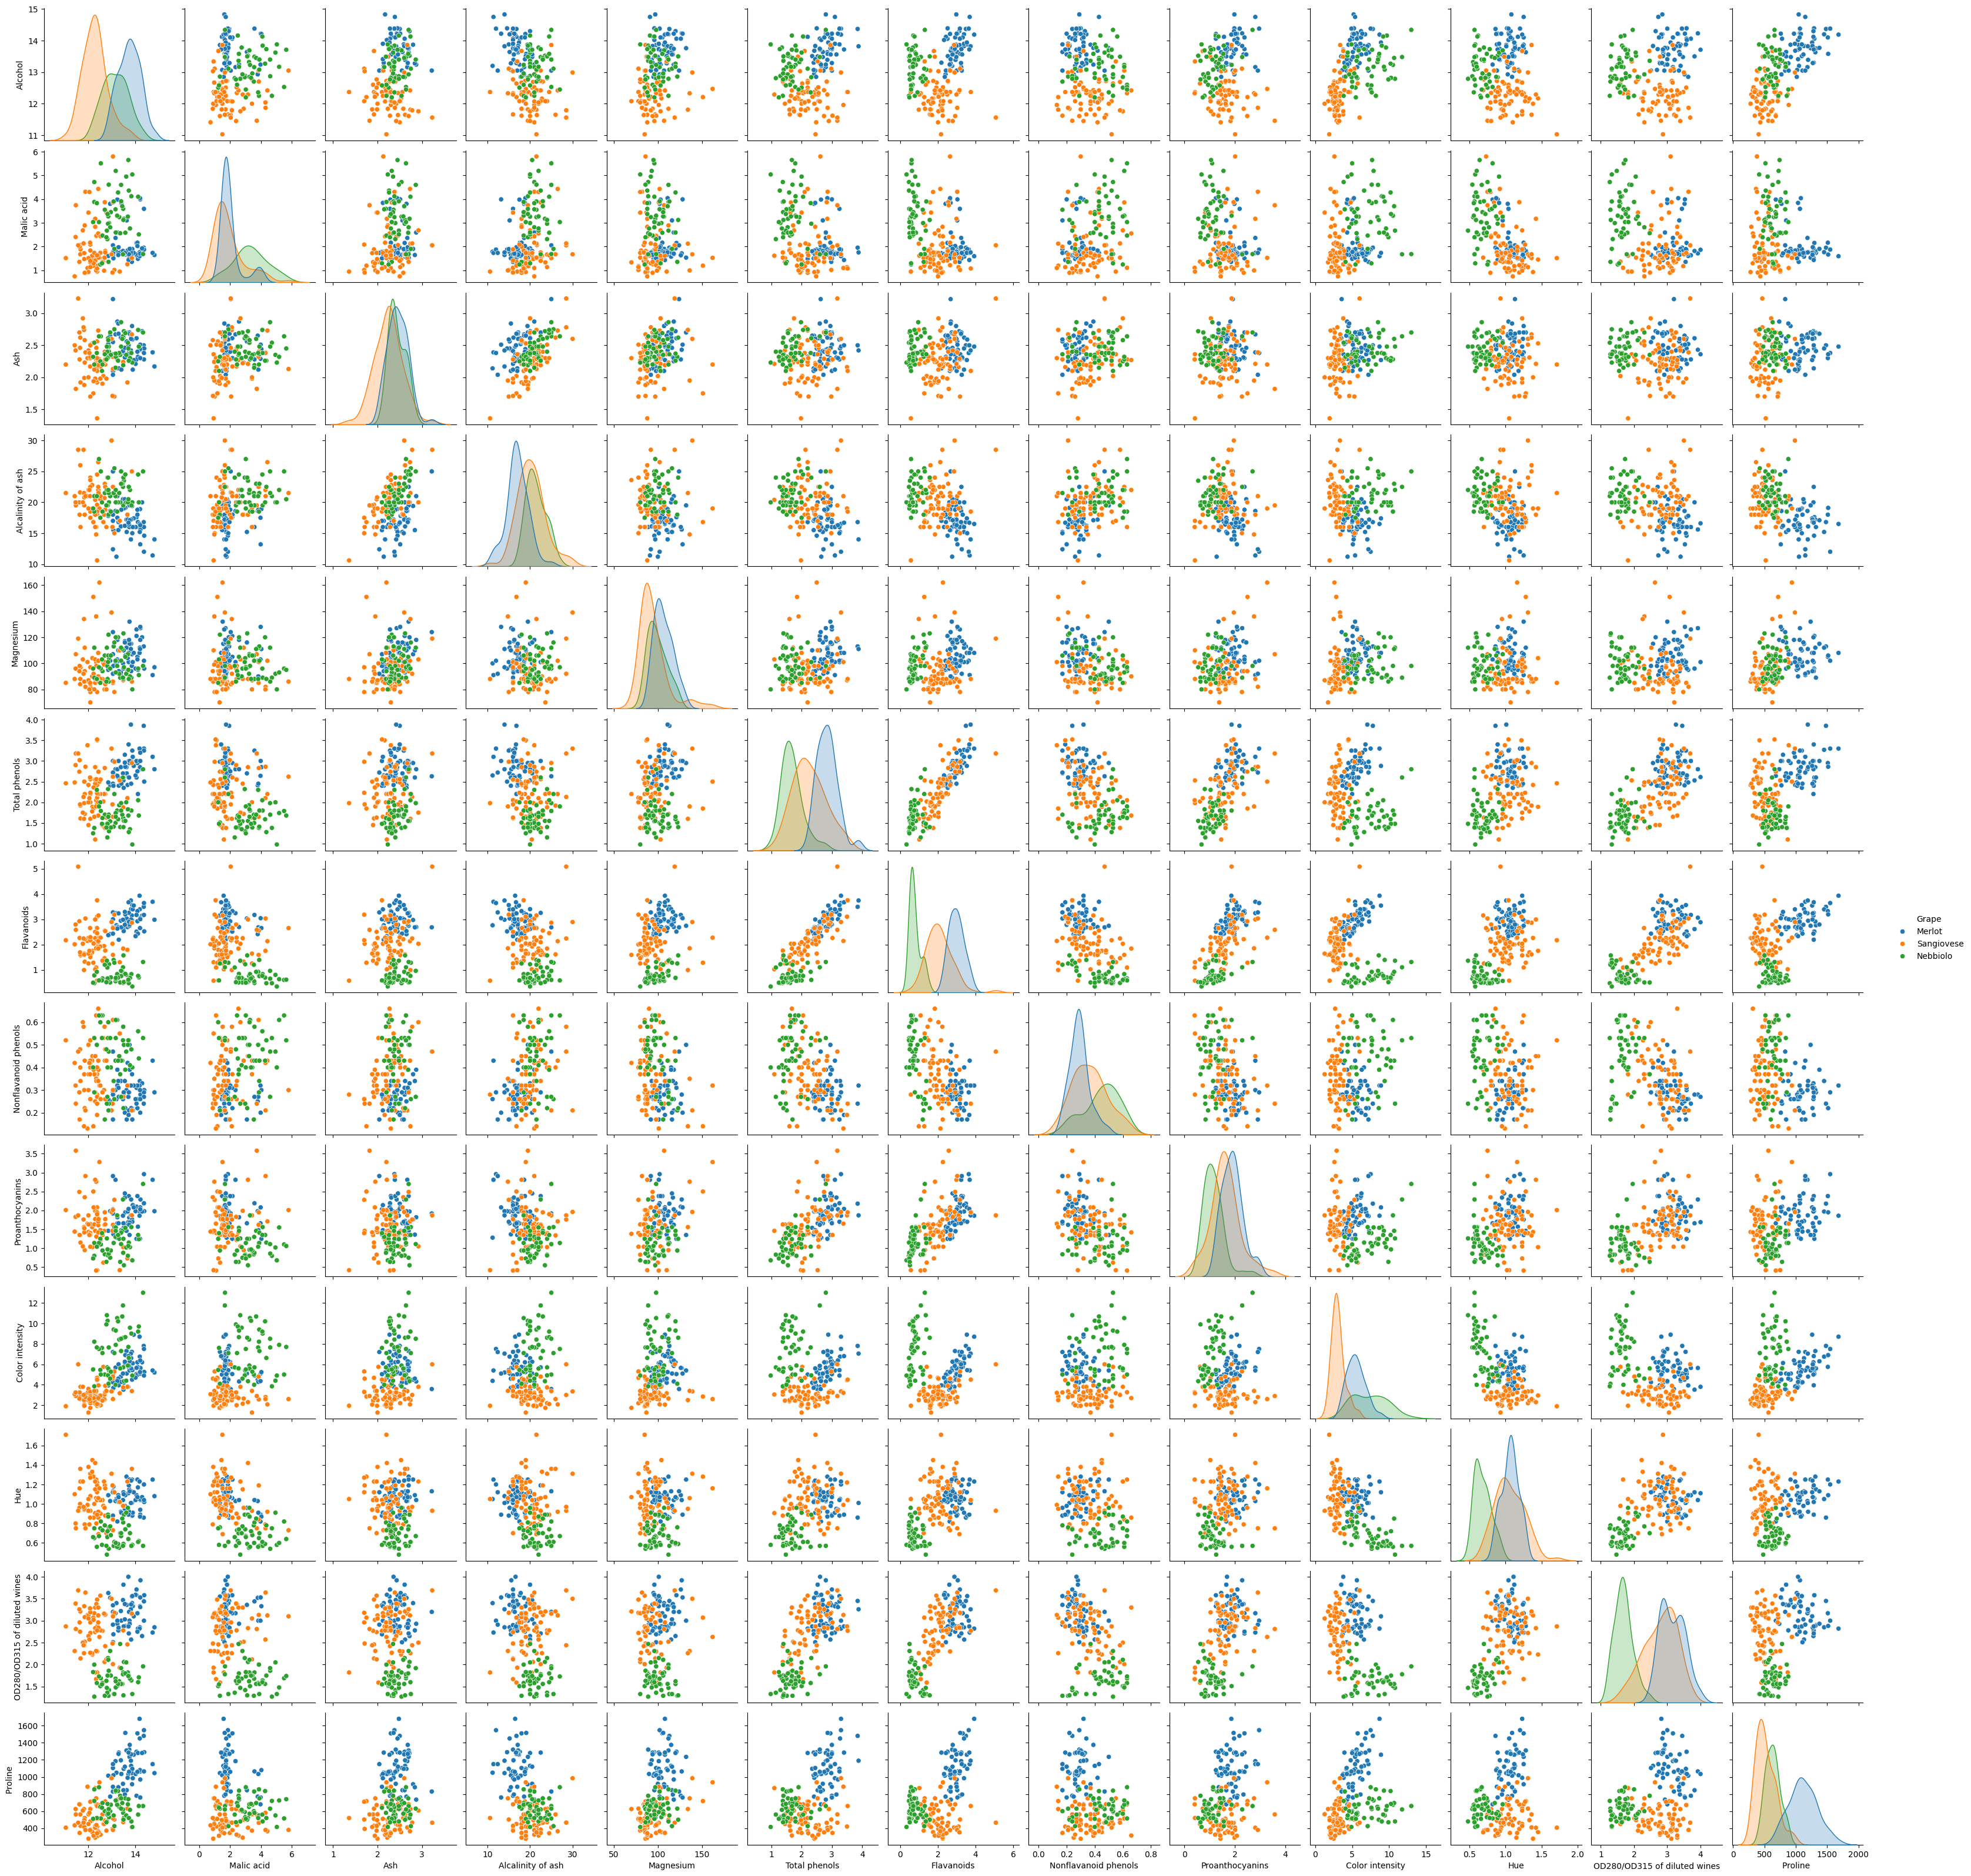

In [8]:
sns.pairplot(df_wines, hue='Grape')

Pääasiassa rypäleet erottuvat kyllä hieman enemmän limittäin kuin toivoisi mutta ovat kyllä eroteltavissa, alkoholipitoisuus, kokonais fenolien määärä ("total phenols") ja flavonoidit korostavat eri rypäleitä paremmin. Katsotaan miten eri luokittelumallit onnistuvat tunnistaa rypäleet. 
Koska rypäleiden välillä on havaittavissa eroja niiden ominaisuuksien osalta, en tee erikseen erottelua selittävästä muuttujasta, vaan aineistossa käytetään kaikkia ominaisuuksia selittävänä muuttujana

In [29]:
# Aloitetaan määrittelmällä kohdemuuttuja sekä muodostamalla testi- sekä opetusdatat.

# Rypäleiden ominaisuudet
wines_x = df_wines.drop('Grape', axis=1)

 # kohdemuuttuja, eli rypäleet
wines_y = df_wines['Grape']

# Muodostetaan testi- ja opetusdata
# train_test_split function random state paramtertin random seed voi olla numeraalinen arvo väliltä 0 - 42.
# Koska Douglas Adams on hieno henkilö ja hänen vastauksensa elämälle sattuu olemaan sama kuin ikäni nyt, käytetään arvoa 42.

# Määritellään random seed omaksi muuttujaksi, joten voidaan tarvittaessa testata miten sen muuttaminen vaikuttaa tuloksiin.
random_seed = 42

wines_x_trainning_data, wines_x_testing_data, wines_y_trainning_data, wines_y_testing_data = train_test_split(wines_x, wines_y, random_state=random_seed)


Koska olen eri luokittelumallien tuloksista kovin utelias, niin käytetään tähän neljää eri luokittelumallia

- Logistinen regressio
- Päätöspuu
- Satunnaismetsä
- Gradientitehostus

Aloitetaan siis testidatan syöttäminen luokittelumalleille.

In [30]:
# HUOM! En käytä eri luokittelumalleista lyhentteitä, jotta koodi olisi helpommin luettavissa.

# Tätä tehdessä kävi ilmi että data-aineisto olikin sen verran iso, että LogisticRegression funktion
# iterointi määrää piti nostaa oletuksesta (100) huomattavasti.

logistic_regression = LogisticRegression(random_state=random_seed, max_iter=10000)
logistic_regression.fit(wines_x_trainning_data, wines_y_trainning_data)

# Ei määritellä Päätöspuulle, satunnaismetsälle tai gradientitehostukselle syvyyttä, vaan oletaan että se on "none".
# Oletuksella tämä on "none" päätöspuussa ja satunnaismetsässä mutta gradientitehostuksessa oletus on 3.
# Käytännössä tämä määrittelee paljon kerroksia muodostetaan, jos arvo on "none" niin niitä tulee sen mukaan miten materiaalia on.
# Manuaalista lainattuna : If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# Tämä päätös luonnollisesti vaikuttaa tehokkuuteen, mutta tässä joulua odotellessa ei ole kovin kiire.

decision_tree_classifier = DecisionTreeClassifier(max_depth=None, random_state=random_seed)
decision_tree_classifier.fit(wines_x_trainning_data, wines_y_trainning_data,)

random_forest_classifier = RandomForestClassifier(max_depth=None, random_state=random_seed)
random_forest_classifier.fit(wines_x_trainning_data, wines_y_trainning_data)

gradient_boosting_classifier = GradientBoostingClassifier(max_depth=None, random_state=random_seed)
gradient_boosting_classifier.fit(wines_x_trainning_data, wines_y_trainning_data)

GradientBoostingClassifier(max_depth=None, random_state=42)

Testataan arivoidana siis mallien tarkuutta testidatassa.  
Tehdään tähän näppärä koodipätkä ja annetaan sen päättää paremmuus.


In [ ]:
# Luodaan dictionary tuloksia varten
statistical_learning_models = {}

# Lasketaan tulokset
statistical_learning_models['Logistinen regressio'] = logistic_regression.score(wines_x_testing_data, wines_y_testing_data)
statistical_learning_models['Päätöspuu'] = decision_tree_classifier.score(wines_x_testing_data, wines_y_testing_data)
statistical_learning_models['Satunnaismetsä'] = random_forest_classifier.score(wines_x_testing_data, wines_y_testing_data)
statistical_learning_models['Gradientitehostus'] = gradient_boosting_classifier.score(wines_x_testing_data, wines_y_testing_data)

# Järjestetään dictionary arvojen mukaan
dict(sorted(statistical_learning_models.items(), key=lambda item: item[1]))

# käydään listaläpi ja tulostetaan ennusteet paremmuus järjestyksessä.
i = 1

for key, value in statistical_learning_models.items():
    



## Osa 2 - regressiomalli - Betonin lujuuteen vaikuttavia tekijöitä

Tausta tämän kyseisen data-aineiston valintaan johtuu oikeastaan rakentamiseen liittyvästä perin mielenkiintoisesta argumentista. Aikaisemassa työssäni erään kohteen aloitus myöhästyi useammalla kuukaudella ja selite tälle oli että 'Betoni ei ole kuivunut kunnolla, odotettu jo vuosi', vaikka voisi luulla että tämä olisi ollut vitsi, niin tämä näytti olevan se virrallinen vastausta rakennuttajalta. Tästä syystä olen perin utelias tietämään mikä vaikuuttaa Betonin lujuuteen. 


In [9]:
# Aloitetaan lukemalla data-aineisto ja tarkastellaan mitä se sisältää.
df_concrete = pd.read_excel(concrete_data)
df_concrete

Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...                                                 ...       
1025                                              116.0       
1026                                                0.0       
1027                                              139.4       
1028                                              186.7       
1029                                              100.5       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
1025                                        90.3   
1026                                       115.6   
1027                                       108.6   
1028                                         0.0   
1029                                        78.3   

      Water  (component 4)(kg in a m^3 mixture)  \
0                                         162.0   
1                                         162.0   
2                                         228.0   
3                                         228.0   
4                                         192.0   
...                                         ...   
1025                                      179.6   
1026                                      196.0   
1027                                      192.7   
1028                                      175.6   
1029                                      200.6   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                   2.5     
1                                                   2.5     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...     
1025                                                8.9     
1026                                               10.4     
1027                                                6.1     
1028                                               11.3     
1029                                                8.6     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                                1040.0      
1                                                1055.0      
2                                                 932.0      
3                                                 932.0      
4                                                 978.4      
...                                                 ...      
1025                                              870.1      
1026                                              817.9      
1027                                              892.4      
1028                                         

In [10]:
df_concrete.describe()

Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1030.000000   
mean                                    54.187136   
std                                     63.996469   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                    118.270000   
max                                    200.100000   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  181.566359   
std                                    21.355567   
min                                   121.750000   
25%                                   164.900000   
50%                                   185.000000   
75%                                   192.000000   
max                                   247.000000   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                        1030.000000     
mean                                            6.203112     
std                                             5.973492     
min                                             0.000000     
25%                                             0.000000     
50%                                             6.350000     
75%                                            10.160000     
max                                            32.200000     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                        1030.000000      
mean                                          972.918592      
std                                            77.753818      
min                                           801.000000      
25%                                           932.000000      
50%                                           968.000000      
75%                                          1029.400000      
max                                          1145.000000      

       Fine Aggregate (component 7)(kg in a m^3 mixture)    Age (day)  \
count                                        1030.000000  1030.000000   
mean                                          773.578883    45.662136   
std                                            80.175427    63.169912   
min                                           594.000000     1.000000   
25%                                           730.950000     7.000000   
50%                                           779.510000    28.000000   
75%                                           824.000000    56.000000   
max                                           992.600000   365.000000   

       Concrete compressive strength(MPa, megapascals)   
count                                       1030.000000  
mean                                          35.817836  
std                                           16.705679

In [11]:
df_concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  